# Filtragem (Espacial ou na Frequência)

## Introdução

A **Filtragem Espacial** consiste de técnicas que agem diretamente nos pixels da imagem, utilizando-se de máscaras que se deslocam ao longo de todos os pixels. Durante essa varredura dos pixels da imagem, a máscara vai alterando cada pixel de acordo com a sua vizinhança contida na dimensão da máscara escolhida.

Os **Filtros Espaciais** podem ser divididos em **Linear**, em que a saída do pixel tem relação linear com a vizinhança, pode ser obtida por convolução; e **Não-Linear**, em que a saída do pixel é obtida por outros meios, como ocorre no filtro mediana.

A **Filtragem na Frequência** consiste de técnicas que agem na distribuição de frequência da imagem, obtida pela transformada de Fourier.

Os **Filtros no Domínio da Frequência** podem ser divididos em **Filtros Passa-Baixa**, **Filtros Passa-Alta**, ou **Filtros Passa-Faixa**, de acordo com a frequência a ser manipulada. Lembrando que componentes de alta frequência correspondem às bordas de uma imagem, e componentes de baixa frequência correspondem às regiões suaves.

## Implementação

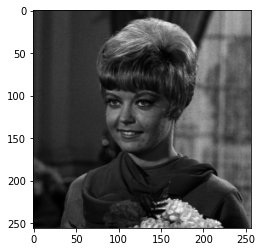

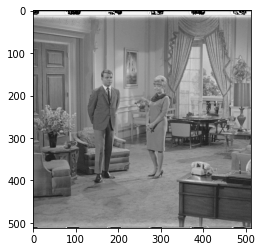

In [99]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math
from IPython.display import Image

imgA = cv.imread("../gcPDI2/imgPDI2/female01.tiff",0)
plt.imshow(imgA,"gray")
plt.show()
imgB = cv.imread("../gcPDI2/imgPDI2/scene.tiff",0)
plt.imshow(imgB,"gray")
plt.show()

### Filtro Espacial de Smoothing

### Filtro Espacial de Sharpening

### Filtro na Frequência Passa-Baixa

In [100]:
#FrequencyFilter
##"FULL" Mode already print everything
def FFLowPass(img, Fsize, mode='DEFAULT'):    
    #Filter 
    ##Ideal    
    rows, cols = img.shape
    base = np.zeros((rows, cols))
    centerx, centery = (rows/2,cols/2)
    ##Drawn a Circle
    for x in range(cols):
        for y in range(rows):
            if math.hypot(x - centerx, y - centery) < Fsize:
                base[y,x] = 1
                
    #Frequency Domain
    ##This function computes the n-dimensional discrete Fourier Transform
    spectrum = np.fft.fft2(img)
    ##Shift the zero-frequency component to the center of the spectrum.
    centspectrum = np.fft.fftshift(spectrum)
    
    #Apply
    filtercentspectrum = centspectrum*base
    
    #Uncentered
    filterspectrum = np.fft.ifftshift(filtercentspectrum)
    
    filterimg = np.fft.ifft2(filterspectrum)
    result = np.real(filterimg)
    
    if mode == 'FULL':
        plt.imshow(img,cmap='gray')
        plt.title('Imagem Original')
        plt.show()
        
        plt.imshow(np.log(1+np.abs(spectrum)),cmap='gray')
        plt.title('Espectro')
        plt.show()       
        plt.imshow(np.log(1+np.abs(centspectrum)),cmap='gray')
        plt.title('Espectro Centralizado')
        plt.show()          
        plt.imshow(base,cmap='gray')
        plt.title('Filtro Utilizado')
        plt.show()

        plt.imshow(np.log(1+np.abs(filtercentspectrum)),cmap='gray')
        plt.title('Espectro Filtrado e Centralizado')
        plt.show()
        plt.imshow(np.log(1+np.abs(filterspectrum)),cmap='gray')
        plt.title('Espectro Filtrado')
        plt.show()   
        #plt.imshow(20*np.log(np.abs(filtercentspectrum)),cmap='gray')
        #plt.title('Espectro Filtrado e Centralizado')
        #plt.show()                
        #plt.imshow(20*np.log(np.abs(filterspectrum)),cmap='gray')
        #plt.title('Espectro Filtrado')
        #plt.show()
        
        plt.imshow(result,cmap='gray')
        plt.title('Imagem Filtrada')
        plt.show()        
        
    return result

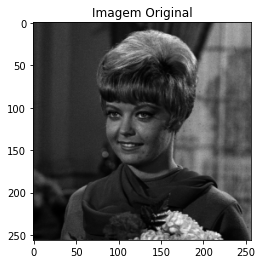

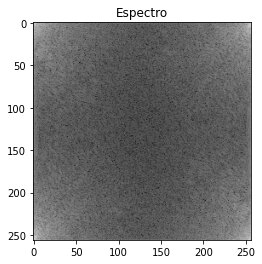

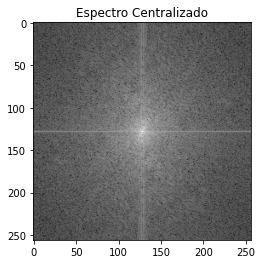

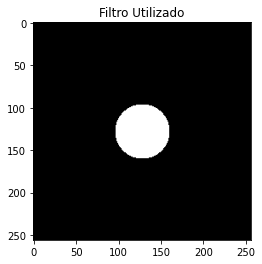

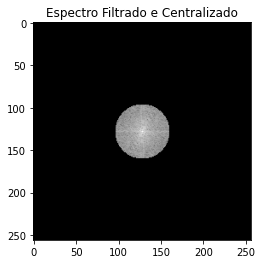

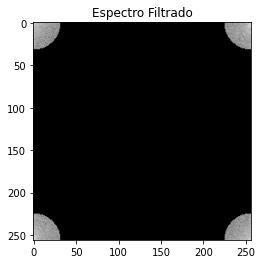

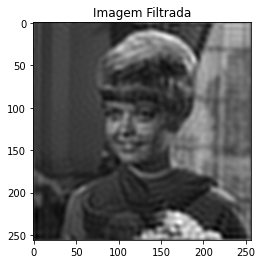

In [101]:
result = FFLowPass(imgA, 32, mode='FULL')

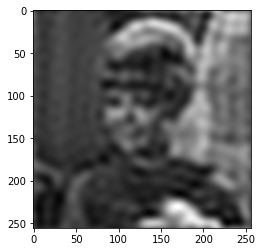

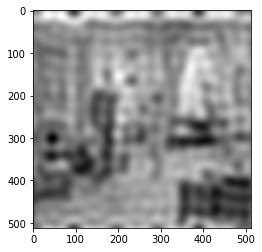

In [102]:
resultA = FFLowPass(imgA, 16)
plt.imshow(resultA,cmap='gray')
plt.show()
resultB = FFLowPass(imgB, 16)
plt.imshow(resultB,cmap='gray')
plt.show()

### Filtro na Frequência Passa-Alta

## Conclusão

## Fontes

https://www.geeksforgeeks.org/spatial-filtering-and-its-types/

https://www.geeksforgeeks.org/frequency-domain-filters-and-its-types/

https://www.tutorialspoint.com/dip/introduction_to_frequency_domain.htm

https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82